Predict whether the passenger will survive or not->
Analytic Approach->SL (Dependent variable)

Regression(Numerical) or Classification(Categorical)

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [73]:
df=pd.read_csv("/content/titanic-training-data.csv")

In [74]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [77]:
df.shape

(891, 12)

In [78]:
891-204

687

In [79]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
## Data Understanding->Kindly complete the vis
### data preparation
#### Missing values
age_median=df["Age"].median()
age_median

28.0

In [81]:
df["Age"]=df["Age"].replace(np.nan,age_median)

In [82]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
emb_mode=df["Embarked"].mode()[0]
emb_mode

'S'

In [84]:
df["Embarked"]=df["Embarked"].replace(np.nan,emb_mode)

In [85]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [86]:
df=df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1)

In [87]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
623,0,3,male,21.0,0,0,7.8542,S


<Axes: xlabel='Age'>

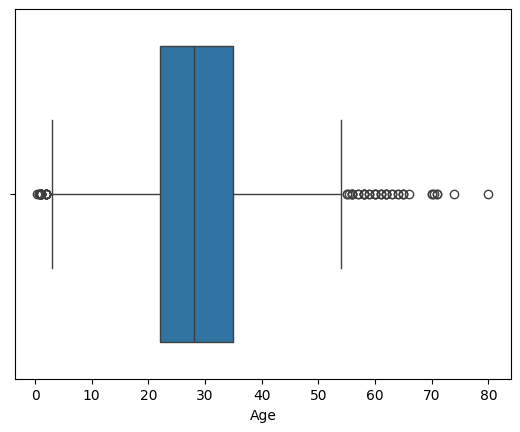

In [88]:
sns.boxplot(x="Age",data=df)

In [89]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  iqr=q3-q1
  lower_range=q1-1.5*iqr
  upper_range=q3+1.5*iqr
  return lower_range,upper_range

In [90]:
lowage,uppage=remove_outlier(df["Age"])
df["Age"]=np.where(df["Age"]>uppage,uppage,df["Age"])
df["Age"]=np.where(df["Age"]<lowage,lowage,df["Age"])

<Axes: xlabel='Age'>

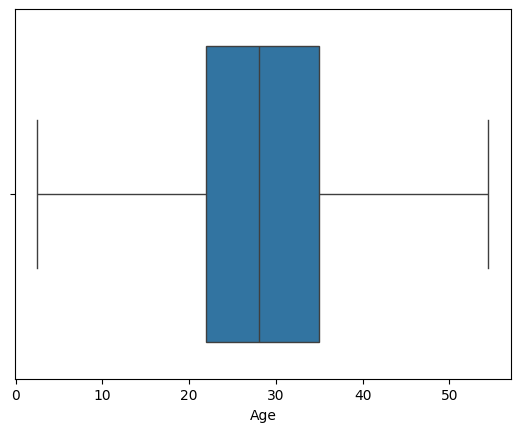

In [91]:
sns.boxplot(x="Age",data=df)

In [92]:
df.shape

(891, 8)

In [93]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [94]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [95]:
### Encoding
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [96]:
df.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
858,1,3,24.0,0,3,19.2583,True,False,True,False,False
153,0,3,40.5,0,2,14.5000,False,True,False,False,True
865,1,2,42.0,0,0,13.0000,True,False,False,False,True
855,1,3,18.0,0,1,9.3500,True,False,False,False,True
406,0,3,51.0,0,0,7.7500,False,True,False,False,True
785,0,3,25.0,0,0,7.2500,False,True,False,False,True
450,0,2,36.0,1,2,27.7500,False,True,False,False,True
341,1,1,24.0,3,2,263.0000,True,False,False,False,True
559,1,3,36.0,1,0,17.4000,True,False,False,False,True
861,0,2,21.0,1,0,11.5000,False,True,False,False,True


In [97]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female       bool
Sex_male         bool
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
dtype: object

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [99]:
y=df[["Survived"]]
x=df.drop(["Survived"],axis=1)

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [101]:
model_lr=LogisticRegression()

In [102]:

model_lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
model_lr.score(x_train,y_train)

0.797752808988764

In [104]:
model_lr.score(x_test,y_test)

0.8246268656716418

In [117]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(max_depth=5)

In [118]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [119]:
model_dt.score(x_train,y_train)

0.841091492776886

In [120]:
model_dt.score(x_test,y_test)

0.8470149253731343

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
model_rf=RandomForestClassifier(n_estimators=100,max_features=3)

In [142]:
model_rf.fit(x_train,y_train)

<ipython-input-142-3db5320b3cd1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train,y_train)


RandomForestClassifier(max_features=3)

In [143]:
model_rf.score(x_train,y_train)

0.9823434991974318

In [144]:
model_rf.score(x_test,y_test)

0.7611940298507462

In [146]:
predictions=model_lr.predict(x_test)

In [147]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

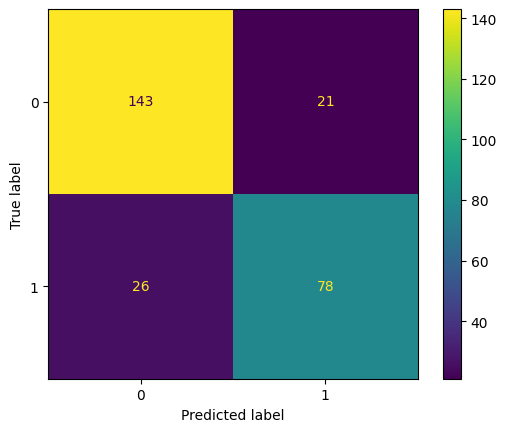

In [148]:
conf_m = ConfusionMatrixDisplay(confusion_matrix(y_test,predictions))
conf_m.plot()